In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
x = df.drop('Species', axis=1)
y = df['Species']

In [11]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [12]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

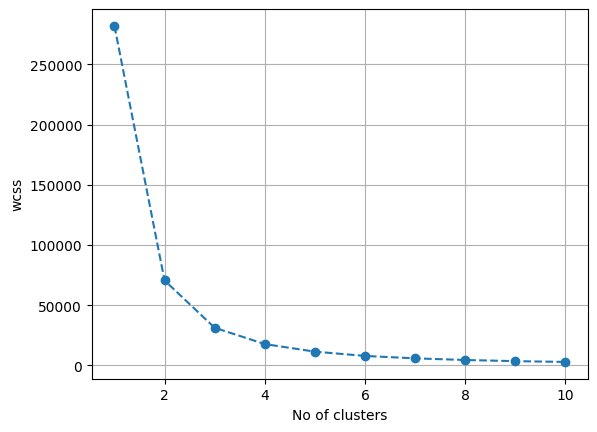

In [9]:
plt.plot(range(1,11), wcss, marker = 'o', linestyle ='--')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.grid(True)
           

In [13]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [14]:
df['Cluster'] = kmeans.labels_

In [18]:
df.tail(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
130,131,7.4,2.8,6.1,1.9,Iris-virginica,1
131,132,7.9,3.8,6.4,2.0,Iris-virginica,1
132,133,6.4,2.8,5.6,2.2,Iris-virginica,1
133,134,6.3,2.8,5.1,1.5,Iris-virginica,1
134,135,6.1,2.6,5.6,1.4,Iris-virginica,1
135,136,7.7,3.0,6.1,2.3,Iris-virginica,1
136,137,6.3,3.4,5.6,2.4,Iris-virginica,1
137,138,6.4,3.1,5.5,1.8,Iris-virginica,1
138,139,6.0,3.0,4.8,1.8,Iris-virginica,1
139,140,6.9,3.1,5.4,2.1,Iris-virginica,1


In [23]:
df['Cluster'].unique()

array([0, 2, 1], dtype=int32)

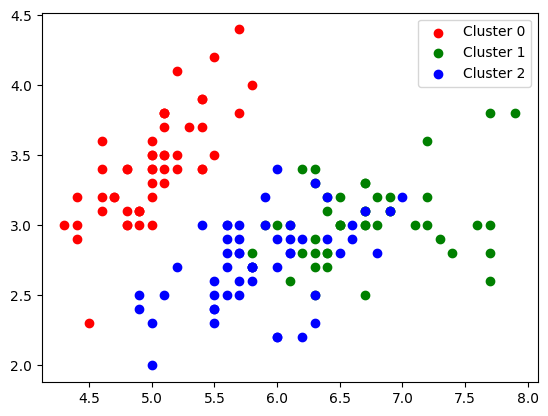

In [24]:
colors = ['r','g','b']

for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['SepalLengthCm'], cluster_data['SepalWidthCm'], c=colors[cluster], label=f'Cluster {cluster}')
    plt.legend()
